# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [3]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [23]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.columns[df.isnull().sum() > 0] # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({'Porcentaje Faltante': missing_percent[missing_percent > 0].round(2)})  # ← COMPLETAR
    #missing_info =  None # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [27]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,Porcentaje Faltante
estadoTran,95.08
estado,57.56
Terreno,37.94
Area Construcción,27.64
tipoTran,0.07
Total M²,0.02


from matplotlib import pyplot as plt
dfValoresFaltantes['Porcentaje Faltante'].plot(kind='hist', bins=20, title='Porcentaje Faltante')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfValoresFaltantes['Porcentaje Faltante'].plot(kind='line', figsize=(8, 4), title='Porcentaje Faltante')
plt.gca().spines[['top', 'right']].set_visible(False)

In [33]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    # ← COMPLETAR
    plt.figure(figsize=(12, 6)) # Para ajustar el tamaño del gráfico
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Mapa de Calor de Valores Faltantes ')
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


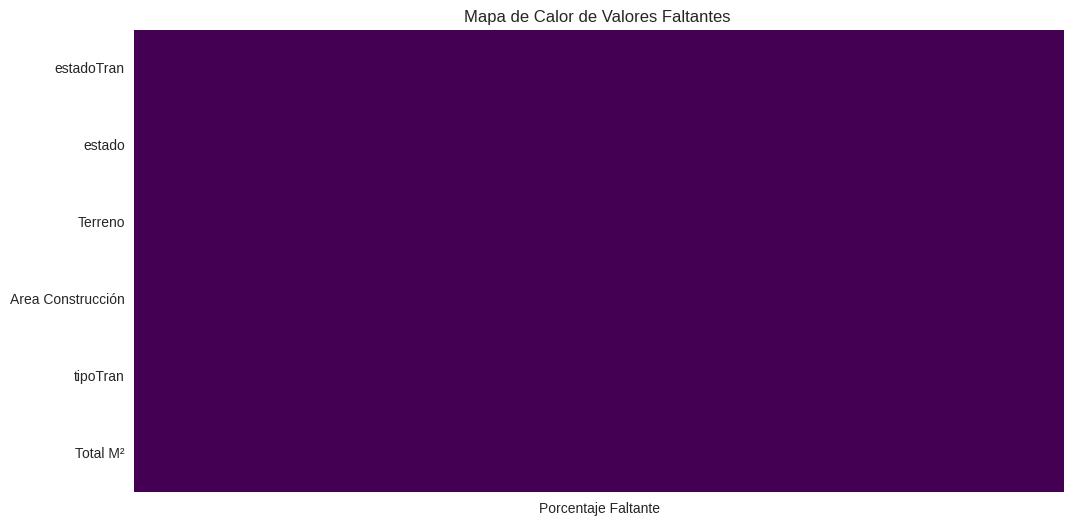

In [34]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(dfValoresFaltantes)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?
  Las columnas estadoTran, estado y Terreno

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones. Si se puede observar una correlacion entre estadoTran, Estado y Terreno

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [48]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # Seleccionar solo columnas numéricas
    df_numeric = df.select_dtypes(include=np.number)

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df_numeric.corr()  # Use df_numeric here
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    print(correlation_matrix)


    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    # ← COMPLETAR
    plt.title('Matriz de Correlación - Variables Numéricas')
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Mapa de Calor de Correlación entre Variables ")
    plt.show()

🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

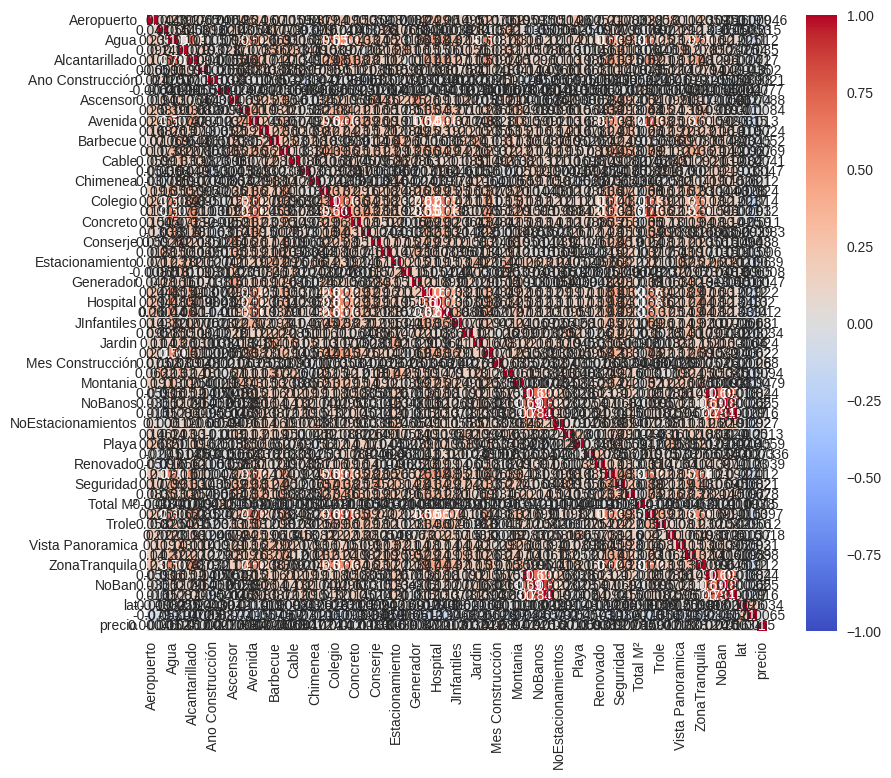

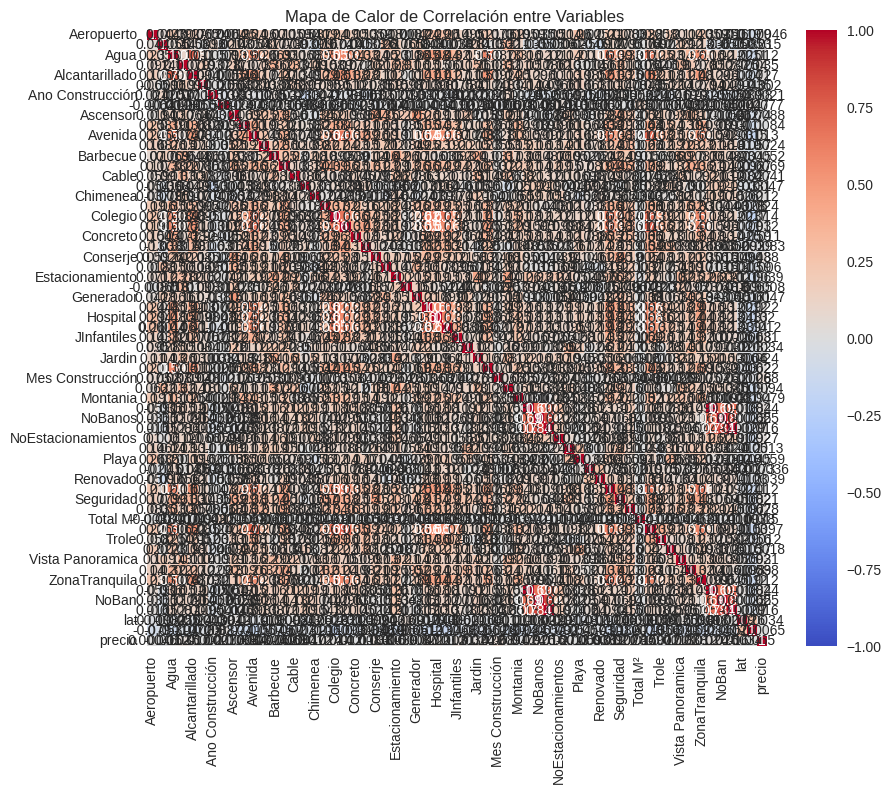

In [49]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?
 Los valores faltantes son MAR.
¿Qué variables podrían predecir la presencia de valores faltantes?
  Las variables Terreno y Estado.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [51]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuración del imputador iterativo
imputer = IterativeImputer(random_state=0)

# Seleccionamos solo las columnas numéricas para la imputación
num_data = df.select_dtypes(include=['float', 'int'])
num_data_imputed = imputer.fit_transform(num_data)

df[num_data.columns] = num_data_imputed

# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [52]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['estado'], df['Terreno'])
tabla_contingencia

# la función chi2_contingency para calcular el estadístico de Chi-Cuadrado
# los grados de libertad y el p-valor
from scipy.stats import chi2_contingency
# Aplicar el test de Chi-Cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Chi-Cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)


Chi-Cuadrado: 5000.382270840834
p-valor: 1.1835864570085946e-09
Grados de libertad: 4416
Frecuencias esperadas:
[[1.45623548e-01 3.64058869e-01 3.64058869e-02 ... 3.64058869e-02
  3.64058869e-02 3.64058869e-02]
 [3.09837335e-03 7.74593338e-03 7.74593338e-04 ... 7.74593338e-04
  7.74593338e-04 7.74593338e-04]
 [8.83036406e-01 2.20759101e+00 2.20759101e-01 ... 2.20759101e-01
  2.20759101e-01 2.20759101e-01]
 ...
 [3.12935709e-01 7.82339272e-01 7.82339272e-02 ... 7.82339272e-02
  7.82339272e-02 7.82339272e-02]
 [2.52517428e+00 6.31293571e+00 6.31293571e-01 ... 6.31293571e-01
  6.31293571e-01 6.31293571e-01]
 [8.36560806e-02 2.09140201e-01 2.09140201e-02 ... 2.09140201e-02
  2.09140201e-02 2.09140201e-02]]


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [55]:
# Aplique una tecnica adecuada para cada columna de valor faltante.

# Identificar columnas categóricas con valores faltantes
categorical_cols_with_missing = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()].tolist()

print(f"Columnas categóricas con valores faltantes a imputar: {categorical_cols_with_missing}")

# Imputar valores faltantes en columnas categóricas usando la moda
for col in categorical_cols_with_missing:
    # Calcula la moda de la columna, la moda puede devolver múltiples valores
    # por lo que tomamos el primero si hay varios
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Columna '{col}' imputada con la moda: '{mode_value}'")

# Verificación después de la imputación categórica
print("\nVerificación de valores faltantes después de imputación categórica:")
print(df[categorical_cols_with_missing].isnull().sum())


Columnas categóricas con valores faltantes a imputar: ['estado', 'Terreno', 'estadoTran', 'tipoTran']
Columna 'estado' imputada con la moda: 'Usada'
Columna 'Terreno' imputada con la moda: '200'
Columna 'estadoTran' imputada con la moda: 'VENDIDA'
Columna 'tipoTran' imputada con la moda: 'De Venta'

Verificación de valores faltantes después de imputación categórica:
estado        0
Terreno       0
estadoTran    0
tipoTran      0
dtype: int64


/tmp/ipython-input-45705927.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

La columna estadoTran, ya que presenta una gran cantidad de valores faltantes.

¿En qué casos consideraron que la eliminación era mejor que la imputación?

En Terreno

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

En que nos ayuda a determinar si es buena idea imputar o recurrir a la eliminacion.

# 🚀 ¡TALLER FINALIZADO!"